In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re

international = pd.read_csv("international_astronauts.csv")

In [2]:
def extract_years(flight_str):
    return [int(y) for y in re.findall(r"\((\d{4})\)", str(flight_str))]

In [4]:
international["years"] = international["Flights"].apply(extract_years)

In [7]:
rows = []
for _, row in international.iterrows():
    for year in row["years"]:
        rows.append({"year": year, "gender": row["gender"]})
expanded_international = pd.DataFrame(rows) #used chaptgpt to fix error of multiple astronauts per row

In [8]:
yearly_counts = expanded_international.groupby(["year", "gender"]).size().unstack(fill_value=0)

In [9]:
cumulative_counts = yearly_counts.cumsum()

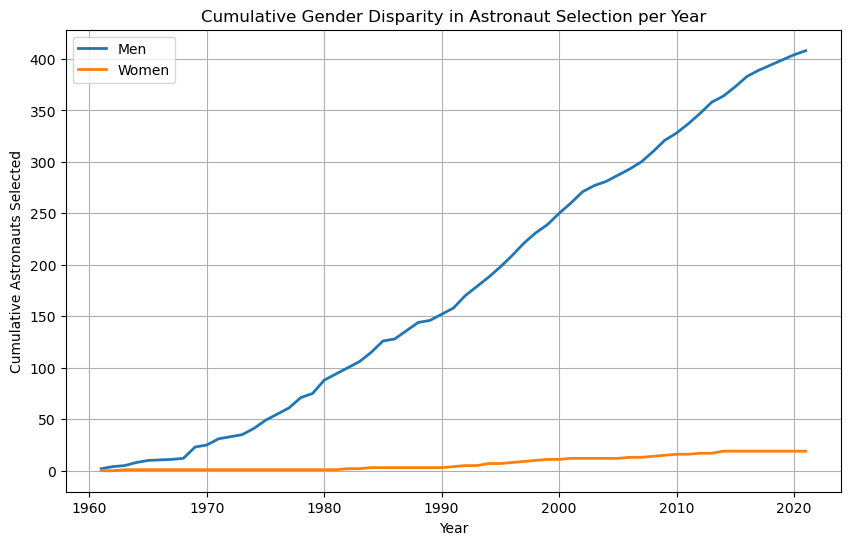

In [12]:
plt.figure(figsize=(10,6))
plt.plot(cumulative_counts.index, cumulative_counts["Man"], label="Men", linewidth=2)
plt.plot(cumulative_counts.index, cumulative_counts["Woman"], label="Women", linewidth=2)
plt.xlabel("Year")
plt.ylabel("Cumulative Astronauts Selected")
plt.title("Cumulative Gender Disparity in Astronaut Selection per Year")
plt.legend()
plt.grid(True)
plt.savefig("gender_disparity_astronauts.png", dpi=300, bbox_inches="tight")
plt.show()

In [11]:
plt.savefig("gender_disparity_astronauts.png", dpi=300, bbox_inches="tight")

<Figure size 640x480 with 0 Axes>

In [13]:
nasa = pd.read_csv("nasa_master_clean.csv")

In [14]:
nasa["years"] = nasa["Flights"].apply(extract_years)

In [17]:
row1 = []
for _, row in nasa.iterrows():
    for year in row["years"]:
        rows.append({"year": year, "total_time": row["Total Flight Time in Minutes"]})
expanded_nasa = pd.DataFrame(rows)

In [18]:
yearly_avg1 = expanded_nasa.groupby("year")["total_time"].mean()

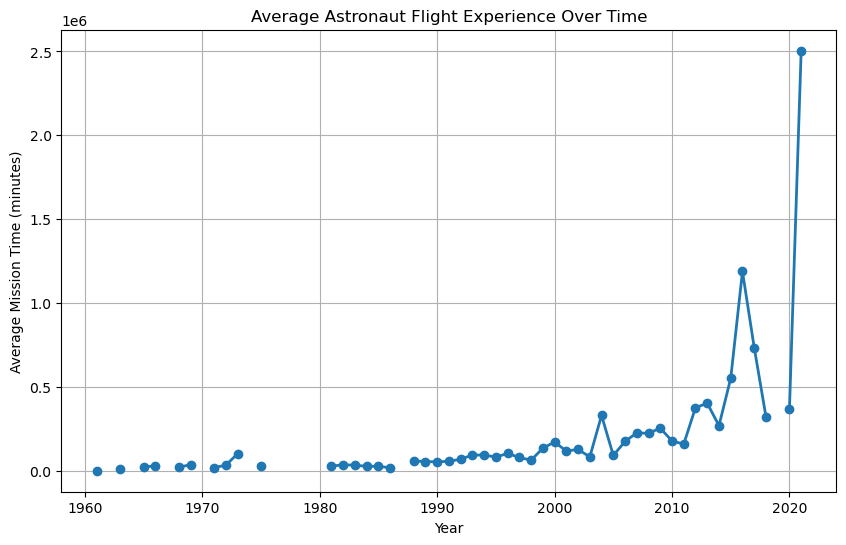

In [21]:
plt.figure(figsize=(10,6))
plt.plot(yearly_avg1.index, yearly_avg1.values, marker="o", linewidth=2)
plt.xlabel("Year")
plt.ylabel("Average Mission Time (minutes)")
plt.title("Average Astronaut Flight Experience Over Time")
plt.grid(True)
plt.show()

In [22]:
rolling_avg = yearly_avg1.rolling(window=5, min_periods=1).mean()

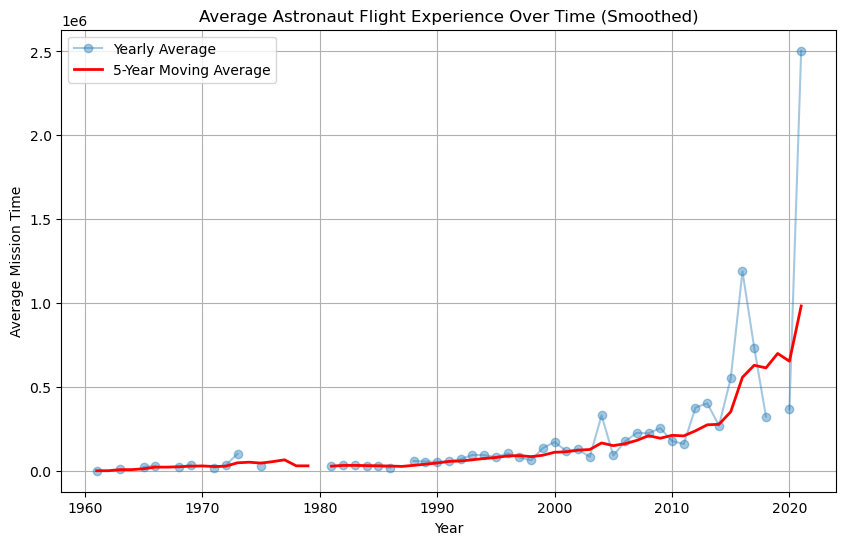

In [25]:
plt.figure(figsize=(10,6))
plt.plot(yearly_avg1.index, yearly_avg1.values, marker="o", alpha=0.4, label="Yearly Average")
plt.plot(rolling_avg.index, rolling_avg.values, color="red", linewidth=2, label="5-Year Moving Average")
plt.xlabel("Year")
plt.ylabel("Average Mission Time")
plt.title("Average Astronaut Flight Experience Over Time (Smoothed)")
plt.legend()
plt.grid(True)
plt.savefig("averageastronautmission.png", dpi=300, bbox_inches="tight")
plt.show()